In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("Fuel.csv")
print("The shape of given dataset is ", df.shape)
df.head(3)

The shape of given dataset is  (946, 15)


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [12]:
col_names = ["Year", "Make", "Model", "Vehicle", "Engine", "Cylinders", "Transmission", "Fuel", "FC_City", "FC_Hwy", "FC_Comb_L", "FC_Comb_Mpg", "Emission", "CO2", "Smog"]
df.columns = col_names

df.columns

Index(['Year', 'Make', 'Model', 'Vehicle', 'Engine', 'Cylinders',
       'Transmission', 'Fuel', 'FC_City', 'FC_Hwy', 'FC_Comb_L', 'FC_Comb_Mpg',
       'Emission', 'CO2', 'Smog'],
      dtype='object')

In [13]:
sample_df = pd.get_dummies(df,columns=["Make", "Model", "Vehicle", "Transmission", "Fuel"])

In [14]:
sample_df.drop(columns="Year", inplace=True, axis=1)
sample_df.head(3)

,Engine,Cylinders,FC_City,FC_Hwy,FC_Comb_L,FC_Comb_Mpg,Emission,CO2,Smog,Make_Acura,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,2.4,4,9.9,7.0,8.6,33,200,6,3,1,...,0,0,0,0,0,0,0,0,0,1
1,3.5,6,12.6,9.4,11.2,25,263,4,5,1,...,0,0,0,0,0,0,0,0,0,1
2,2.0,4,11.0,8.6,9.9,29,232,5,6,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
X = sample_df.drop(['Smog'], axis=1).values
Y = sample_df['Smog'].values

In [16]:
Y = Y.reshape((len(Y), 1))

In [17]:
sample_df["Smog"].unique()

array([3, 5, 6, 7, 1], dtype=int64)

In [18]:
from sklearn.preprocessing import OneHotEncoder
he = OneHotEncoder()
Y = he.fit_transform(Y).toarray()

In [19]:
Y

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)


X_train (662, 803)
Y_train (662, 5)
X_test (284, 803)
Y_test (284, 5)


In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
ip = X_train.shape[1]

In [23]:
model = Sequential()
model.add(Dense(550, activation='relu', input_dim = ip))
#model.add(Dense(550,  activation='relu'))
model.add(Dense(5, activation='softmax'))


In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(X_train, Y_train,batch_size=32, epochs=50, validation_data=(X_test,Y_test))

Epoch 1/50
21/21 [==============================] - 8s 86ms/step - loss: 3.8615 - accuracy: 0.2477 - val_loss: 2.3878 - val_accuracy: 0.2289
Epoch 2/50
21/21 [==============================] - 1s 26ms/step - loss: 1.5414 - accuracy: 0.4003 - val_loss: 1.2507 - val_accuracy: 0.4613
Epoch 3/50
21/21 [==============================] - 1s 37ms/step - loss: 1.1074 - accuracy: 0.5574 - val_loss: 1.2080 - val_accuracy: 0.4401
Epoch 4/50
21/21 [==============================] - 1s 31ms/step - loss: 1.0189 - accuracy: 0.6254 - val_loss: 1.2977 - val_accuracy: 0.4965
Epoch 5/50
21/21 [==============================] - 1s 24ms/step - loss: 0.8964 - accuracy: 0.6677 - val_loss: 1.0418 - val_accuracy: 0.5880
Epoch 6/50
21/21 [==============================] - 1s 26ms/step - loss: 0.8265 - accuracy: 0.6903 - val_loss: 1.0408 - val_accuracy: 0.5423
Epoch 7/50
21/21 [==============================] - 1s 28ms/step - loss: 0.7937 - accuracy: 0.7115 - val_loss: 0.9879 - val_accuracy: 0.5810
Epoch 8/50
21

In [26]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Recall score: %.3f" % recall_score(test, pred,average='weighted',zero_division=1))
print("F1 score: %.3f" % f1_score(test, pred,average='weighted',zero_division=1))
print('Precision Score: %.3f' % precision_score(test, pred,average='weighted',zero_division=1))

Recall score: 0.757
F1 score: 0.756
Precision Score: 0.793


c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


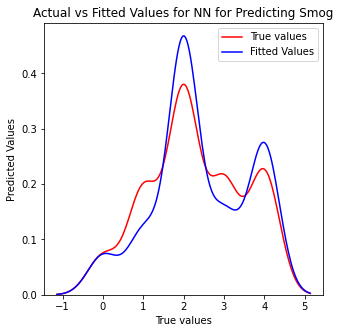

In [29]:
plt.figure(figsize=(5,5))
ax1 = sns.distplot(test, hist=False, color = "r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title("Actual vs Fitted Values for NN for Predicting Smog")
plt.xlabel("True values")
plt.ylabel("Predicted Values")
plt.legend(["True values", "Fitted Values"])
plt.show()